<a href="https://colab.research.google.com/github/thirza258/freecodecamp_rock_paper_scissors/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-01-05 07:49:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2025-01-05 07:49:27 (7.11 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


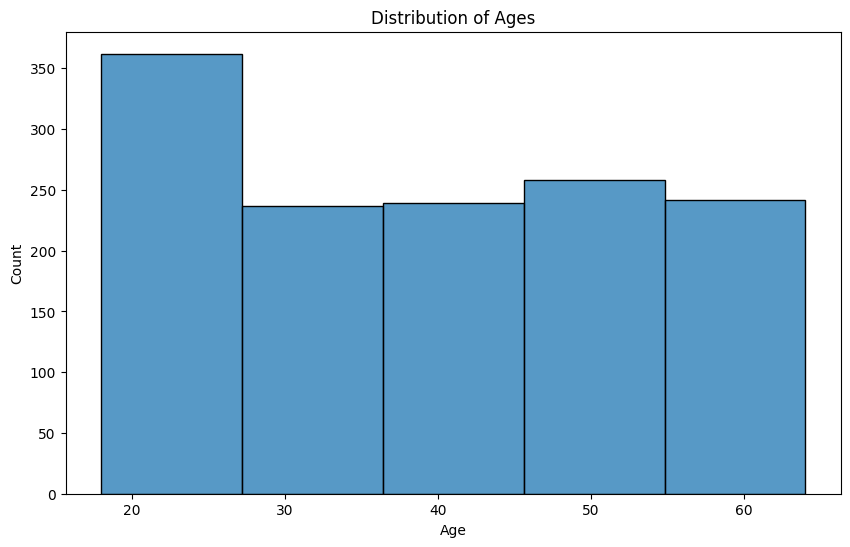

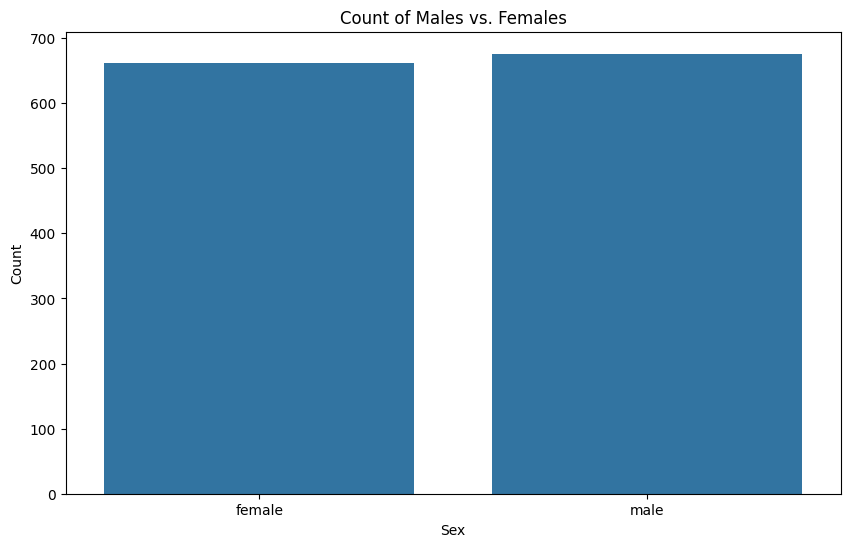

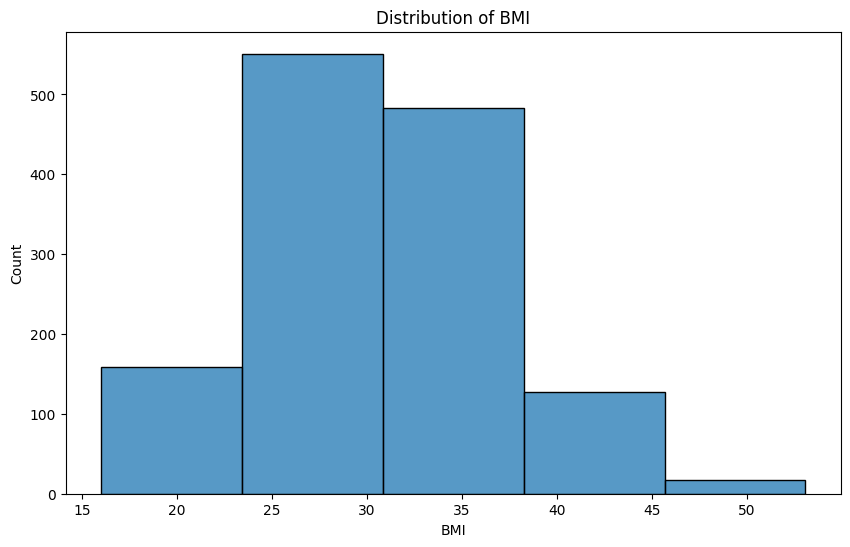

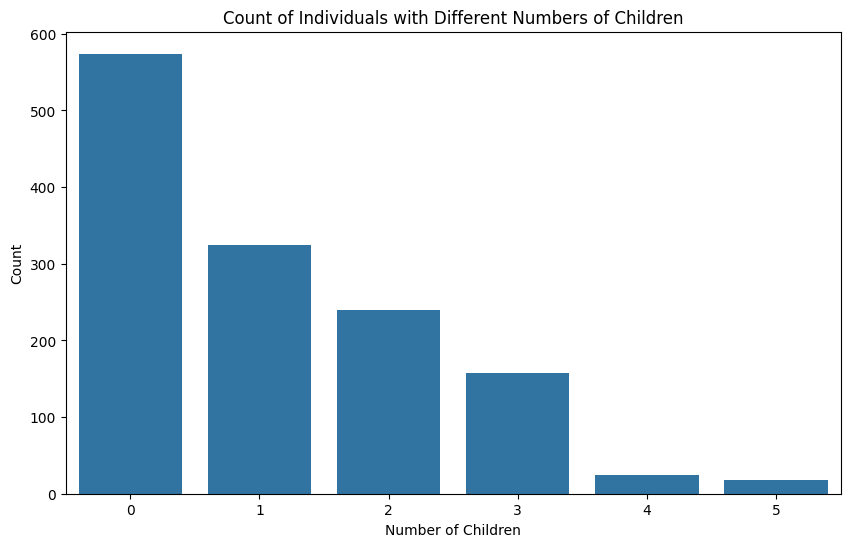

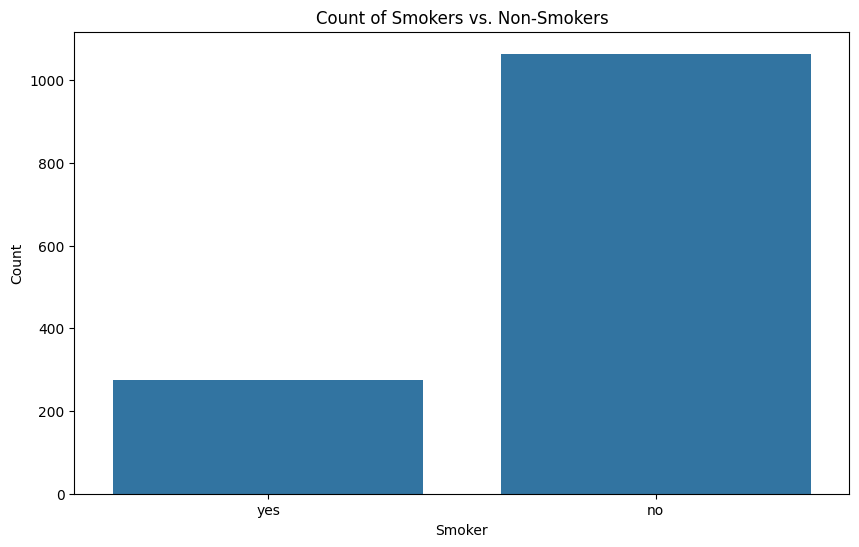

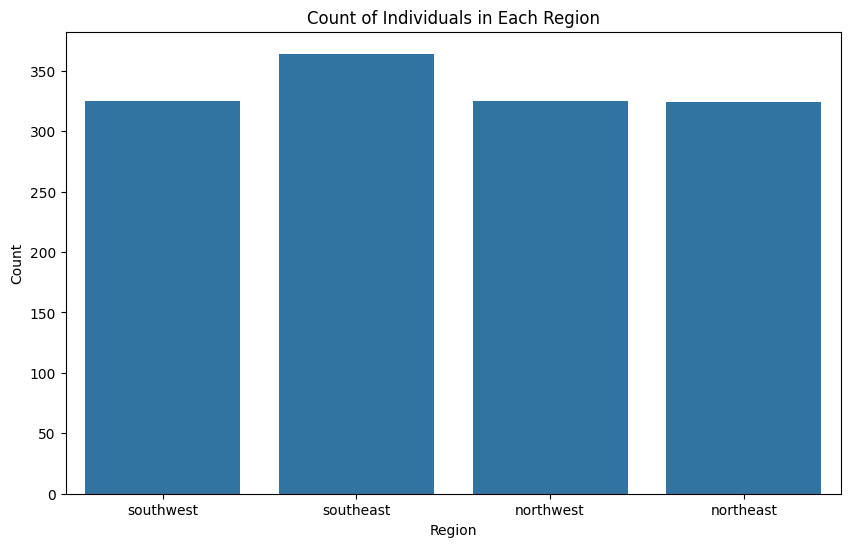

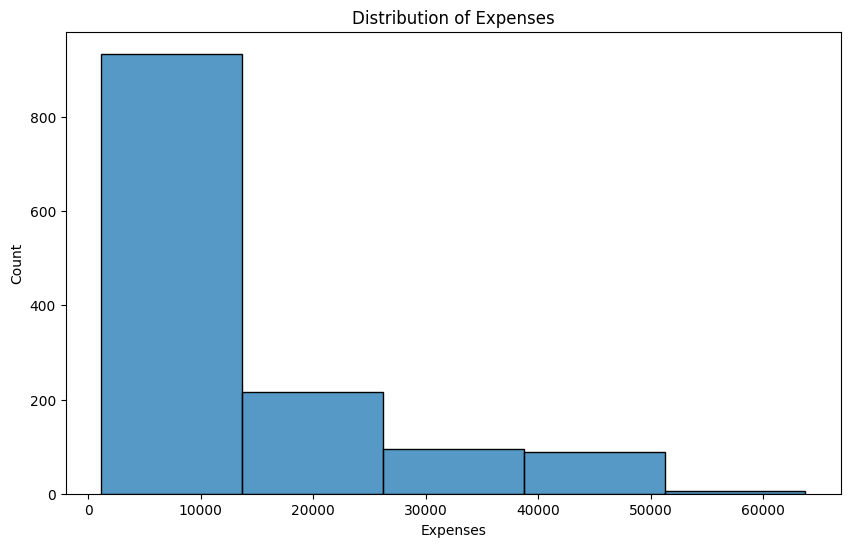

In [3]:
import seaborn as sns
df = dataset

# Age Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=5, kde=False)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Sex Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Count of Males vs. Females')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# BMI Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=5, kde=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Children Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df)
plt.title('Count of Individuals with Different Numbers of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

# Smoker Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df)
plt.title('Count of Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

# Region Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df)
plt.title('Count of Individuals in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Expenses Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['expenses'], bins=5, kde=False)
plt.title('Distribution of Expenses')
plt.xlabel('Expenses')
plt.ylabel('Count')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False) # Replace 'sparse' with 'sparse_output'

# One-hot encode 'sex' and 'smoker'
encoded_columns = encoder.fit_transform(df[['sex', 'smoker']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['sex', 'smoker']))

# Concatenate the original DataFrame with the new one-hot encoded columns
df = pd.concat([df.drop(['sex', 'smoker'], axis=1), encoded_df], axis=1)

# Label encode 'region'
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

df.head()


,age,bmi,children,region,expenses,sex_male,smoker_yes
0,19,27.9,0,3,16884.92,0.0,1.0
1,18,33.8,1,2,1725.55,1.0,0.0
2,28,33.0,3,2,4449.46,1.0,0.0
3,33,22.7,0,1,21984.47,1.0,0.0
4,32,28.9,0,1,3866.86,1.0,0.0


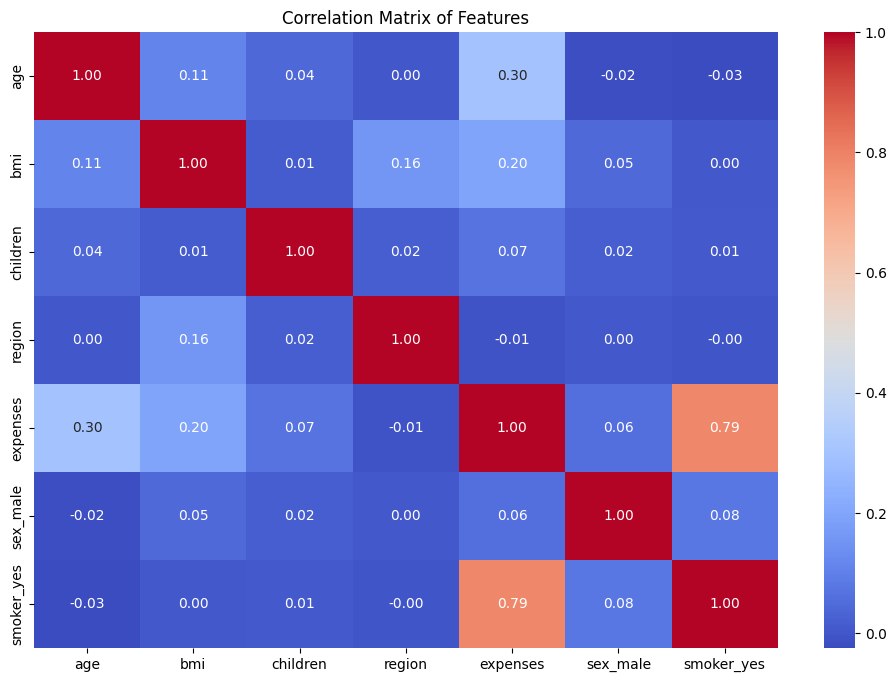

In [7]:
# prompt: make correlation visualization

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

There's positive correlation between smoker_yer, bmi, age

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

df.head()

,age,bmi,children,region,expenses,sex_male,smoker_yes
0,0.021739,0.320755,0.0,1.000000,0.251611,0.0,1.0
1,0.000000,0.479784,0.2,0.666667,0.009636,1.0,0.0
2,0.217391,0.458221,0.6,0.666667,0.053115,1.0,0.0
3,0.326087,0.180593,0.0,0.333333,0.333010,1.0,0.0
4,0.304348,0.347709,0.0,0.333333,0.043816,1.0,0.0


In [12]:
X = df.drop('expenses', axis=1)
y = df['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train


,age,bmi,children,region,sex_male,smoker_yes
560,0.608696,0.107817,0.4,0.333333,0.0,0.0
1285,0.630435,0.223720,0.0,0.000000,0.0,0.0
1142,0.739130,0.239892,0.0,0.666667,0.0,0.0
969,0.456522,0.493261,1.0,0.666667,0.0,0.0
486,0.782609,0.148248,0.6,0.333333,0.0,0.0
...,...,...,...,...,...,...
1095,0.000000,0.415094,0.8,0.000000,0.0,0.0
1130,0.456522,0.212938,1.0,0.666667,0.0,0.0
1294,0.869565,0.247978,0.0,0.000000,1.0,0.0
860,0.413043,0.851752,0.4,1.000000,0.0,1.0


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd

# Assuming X_train and y_train are already defined
# Create a simple neural network model for linear regression

# Use a list of column names to select the desired columns
df_train = X_train[['age', 'bmi', 'smoker_yes']].copy()

model = Sequential([
    layers.Dense(units=1, input_shape=[len(df_train.columns)])
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(df_train, y_train, epochs=100, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5221 - mae: 0.3669 - mse: 0.5221 - val_loss: 0.4444 - val_mae: 0.3159 - val_mse: 0.4444
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4916 - mae: 0.3538 - mse: 0.4916 - val_loss: 0.4077 - val_mae: 0.3207 - val_mse: 0.4077
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4377 - mae: 0.3523 - mse: 0.4377 - val_loss: 0.3773 - val_mae: 0.3353 - val_mse: 0.3773
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4032 - mae: 0.3672 - mse: 0.4032 - val_loss: 0.3523 - val_mae: 0.3489 - val_mse: 0.3523
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3973 - mae: 0.3913 - mse: 0.3973 - val_loss: 0.3326 - val_mae: 0.3608 - val_mse: 0.3326
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3601 - mae: 0.3905 - mse: 0.3601 - val_loss: 0.3168 - val_mae: 0.3705 - val_mse: 0.3168
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3522 - mae: 0.4024 - mse: 0.3522 - val_loss: 

9/9 - 0s - 3ms/step - loss: 0.0114 - mae: 0.0815 - mse: 0.0114
Testing set Mean Abs Error:  0.08 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


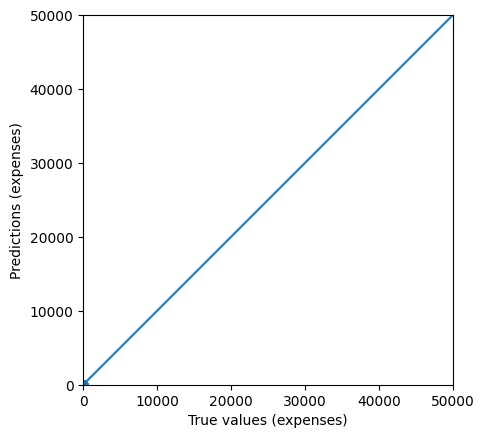

In [21]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
test_dataset = X_test[['age', 'bmi', 'smoker_yes']]
test_labels = y_test

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
